## Machine Learning Lab Assignment - 2

**Author** - Tirth Modi (202201513)

### Ouestion 1
#### Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [188]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_dataset(low,high,size):
    return np.random.uniform(low,high,size)

x1 = uniform_dataset(0,1,20)
print(x1)

[0.50934913 0.76367434 0.4383445  0.26379352 0.50702239 0.21531954
 0.490378   0.96289935 0.7378763  0.88645695 0.75785572 0.82043184
 0.26747895 0.40734933 0.06401529 0.61834622 0.34660091 0.38566378
 0.38304279 0.33275084]


### Question 2
#### Construct the training set T = { (x1,y1),(x2,y2),......,(x20,y20)} using the relation
- Yi = sin(2 π xi) + εi where εi ~ N(0,0.25)

[0.28137202976411224, -0.9244214640479934, 0.6313010651832465, 0.29614549403599333, -0.36096763620504513, 1.0997525037375189, 0.20973455422640094, -0.3540045151961799, -1.0873410618548913, -0.7884034045305514, -0.8690199005521199, -0.9727822046858052, 1.5668017904787492, 0.5302937403377651, -0.0135005978486325, -0.7733973641391605, 0.9163488003913313, 0.5039779115707094, 1.2684676925955602, 0.7941294632260824]


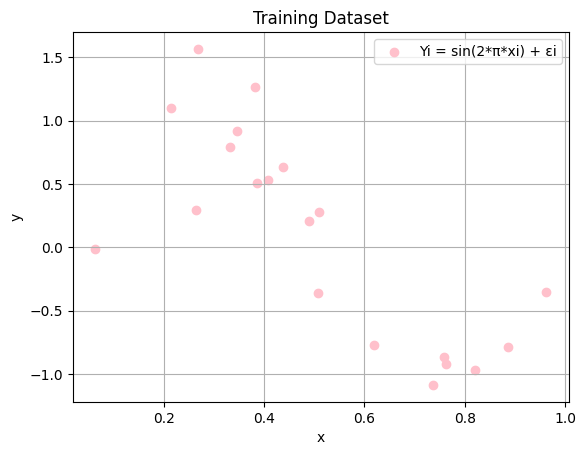

In [189]:
def normal_dataset(mean,std_dev,size):
    return np.random.normal(mean,std_dev,size)
   
noise = normal_dataset(0,0.25,20)

y1 = []
for i in range(0,20):
    y1.append((np.sin(2*np.pi*x1[i]) + noise[i]))

print(y1)

# Plotting the function
plt.scatter(x1, y1, label='Yi = sin(2*π*xi) + εi', color = 'pink')
plt.title('Training Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Question 3
#### In the similar way construct a testing set of size 50 i,e. Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}

[0.7274508613910398, 0.526674065630768, 0.5144532169122636, 0.5164879140807632, 0.5414644667113417, 1.02418605870652, -0.0772945451244223, 0.7087285107680257, -0.8224367473988693, 0.44042954357209635, -0.29238401049238866, -1.0862271779199586, 0.5538892823803893, 1.0100677423601043, -0.2991987905140117, -0.7746511398587524, 1.1246351612316077, -0.3635178789921375, -1.0900801440681616, 1.1085338844475179, -1.0890148614246922, 1.0869431992830643, -0.9938451729645682, -0.5967380221070566, 0.47827390056392616, 1.1427616392182822, -0.30521918467978115, -0.7435564085390962, 1.0925677551459656, -0.3363537764355931, -1.328677298622388, -0.6973647897653834, -0.547894320455471, 0.7851748801086526, -0.8957899999905785, -0.7458924471137058, 1.2041604197267715, 0.4953836173524755, 0.7557216954316932, -0.12080239473111182, -0.34585970919475906, -0.8093862784688731, 0.6172566940778275, -0.8392614771663387, 0.9705809314748866, -0.47161716627643113, 0.7020195105679902, -1.0805417281252676, 0.9334894718

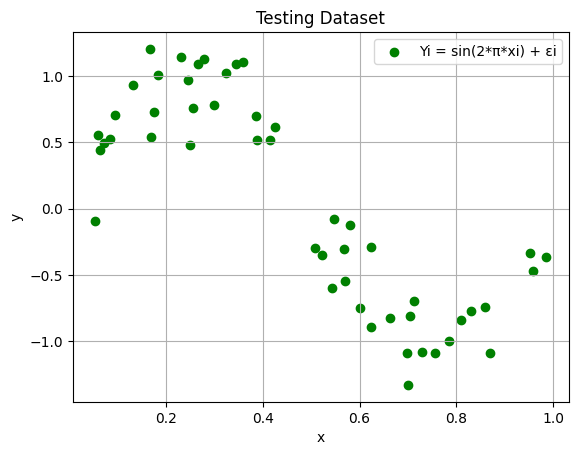

In [190]:
x2 = uniform_dataset(0,1,50)
noise2 = normal_dataset(0,0.25,50)

y2 = []
for i in range(0,50):
    y2.append((np.sin(2*np.pi*x2[i]) + noise2[i]))

print(y2)

# Plotting the function
plt.scatter(x2, y2, label='Yi = sin(2*π*xi) + εi', color = 'green')
plt.title('Testing Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [191]:
def calculate_rmse(x_test, y_test, coefficients):
    y_pred = np.zeros_like(x_test)
    n = len(coefficients)
    
    for i, coeff in enumerate(coefficients):
        y_pred += coeff * (x_test ** (n-1-i))

    residuals = y_test - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    return rmse
    print(f"RMSE for the testing dataset (M=2): {rmse}")

### Question 4-9
#### Estimate the regularized least squared polynomial regression model of order M= 1,2, 3, using the training set T. For example 
- For M=1, we need to estimate F(x) = β1x + β0
- For M = 2, F(x) = β2x + β1x + β0 . 
and so on.

beta_1 = -2.557558404610393 ,beta_0 = 1.3967913372743053


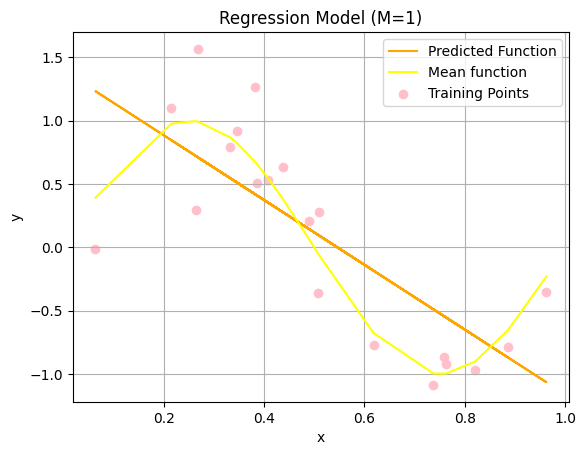

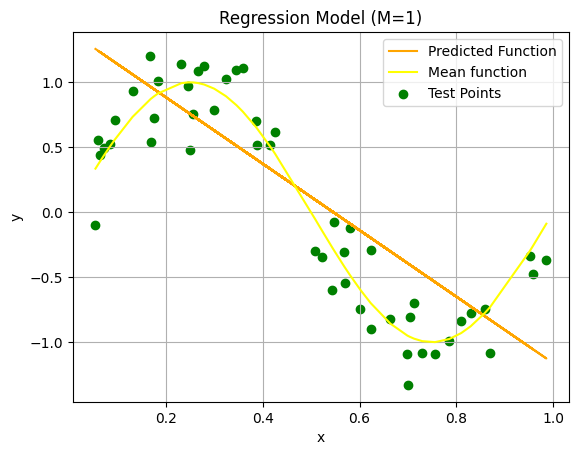

RMSE for the testing dataset (M=1): 0.49413691556094186
beta_1 = -2.5293019248387645 ,beta_0 = 1.3817480792859778


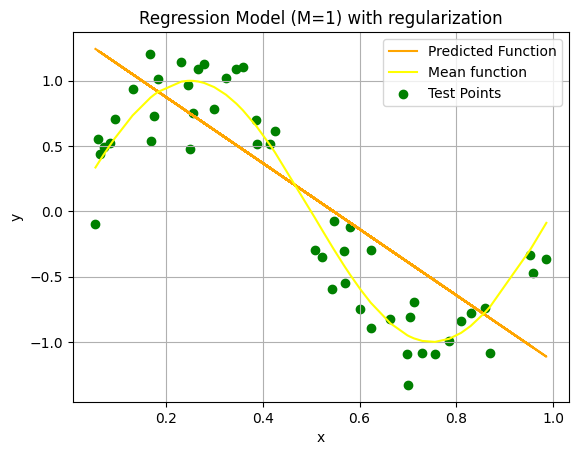

In [192]:
# M = 1

A = []
for i in x1:
    A.append([i,1])

# print(np.array(A))

# Regression Calculation
A_t = np.transpose(A)
A_t_A = A_t.dot(A)
A_t_A_inv = np.linalg.inv(A_t_A)
A_t_A_inv_A_t = A_t_A_inv.dot(A_t)
u = A_t_A_inv_A_t.dot(y1)

# Regression Calculation with lambda
lmbda = 0.01
A_t = np.transpose(A)
A_t_Al = A_t.dot(A) + lmbda*np.eye(2)
A_t_Al_inv = np.linalg.inv(A_t_Al)
A_t_Al_inv_A_t = A_t_Al_inv.dot(A_t)
u2 = A_t_Al_inv_A_t.dot(y1)

print(f"beta_1 = {u[0]} ,beta_0 = {u[1]}")

x_1 = sorted(x1)
x_1 = np.array(x_1)
x_cpy = sorted(x2)
x_cpy = np.array(x_cpy)

# Plotting the function
plt.plot(x1,u[0]*x1 + u[1], label = "Predicted Function", color = 'orange')
plt.plot(x_1,np.sin(2*np.pi*x_1), label = "Mean function", color = 'yellow')
plt.scatter(x1,y1, label = "Training Points", color = 'pink')
plt.title('Regression Model (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Plotting the function
plt.plot(x2,u[0]*x2 + u[1], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2,y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

print(f"RMSE for the testing dataset (M=1): {calculate_rmse(x2, y2, u)}")

print(f"beta_1 = {u2[0]} ,beta_0 = {u2[1]}")

# Plotting the function
plt.plot(x2,u2[0]*x2 + u2[1], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2,y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=1) with regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

beta_2 = -1.6374689416703574, beta_1 = -0.7952030794524391, beta_0 = 1.0177158117401197


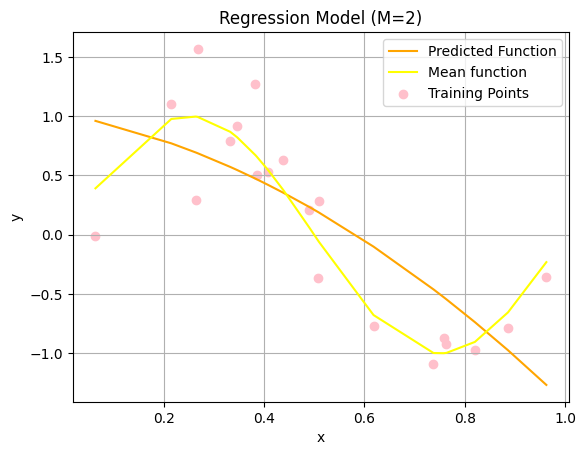

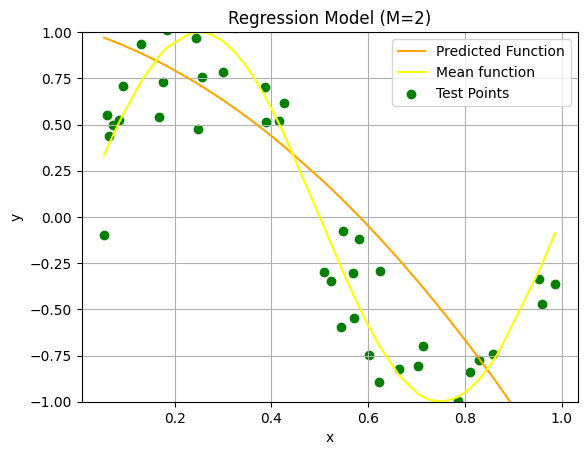

RMSE for the testing dataset (M=2): 0.4904943372421976
beta_2 = -1.5764700606403177, beta_1 = -0.8488767265217492, beta_0 = 1.0252407291724985


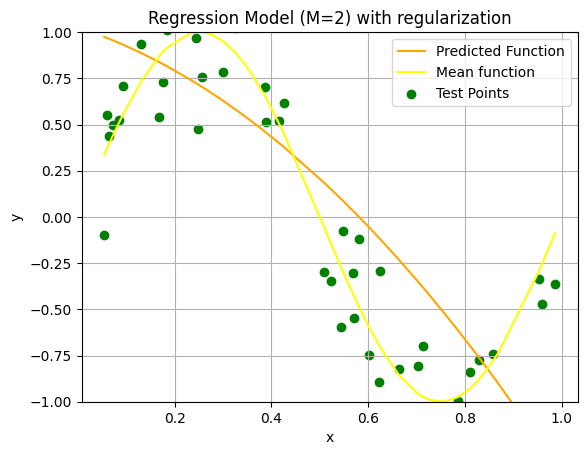

In [193]:
# M = 2

A = []
for i in x1:
    A.append([i*i,i,1])

# print(np.array(A))

# Regression Calculation
A_t = np.transpose(A)
A_t_A = A_t.dot(A)
A_t_A_inv = np.linalg.inv(A_t_A)
A_t_A_inv_A_t = A_t_A_inv.dot(A_t)
u = A_t_A_inv_A_t.dot(y1)

# Regression Calculation with lambda
lmbda = 0.01
A_t = np.transpose(A)
A_t_Al = A_t.dot(A) + lmbda*np.eye(3)
A_t_Al_inv = np.linalg.inv(A_t_Al)
A_t_Al_inv_A_t = A_t_Al_inv.dot(A_t)
u2 = A_t_Al_inv_A_t.dot(y1)

print(f"beta_2 = {u[0]}, beta_1 = {u[1]}, beta_0 = {u[2]}")

x_1 = sorted(x1)
x_1 = np.array(x_1)
x_cpy = sorted(x2)
x_cpy = np.array(x_cpy)

# Plotting the function
plt.plot(x_1,u[0]*x_1*x_1 + u[1]*x_1 + u[2], label = "Predicted Function", color = 'orange')
plt.plot(x_1,np.sin(2*np.pi*x_1), label = "Mean function", color = 'yellow')
plt.scatter(x1, y1, label = "Training Points", color = 'pink')
plt.title('Regression Model (M=2)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Plotting the function
plt.plot(x_cpy,u[0]*x_cpy*x_cpy + u[1]*x_cpy + u[2], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=2)')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

print(f"RMSE for the testing dataset (M=2): {calculate_rmse(x2, y2, u)}")

print(f"beta_2 = {u2[0]}, beta_1 = {u2[1]}, beta_0 = {u2[2]}")

# Plotting the function
plt.plot(x_cpy,u2[0]*x_cpy*x_cpy + u2[1]*x_cpy + u2[2], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=2) with regularization')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


beta_3 = 27.236371004130078, beta_2 = -42.83184878220068, beta_1 = 16.635421298301083, beta_0 = -0.8887645647533396


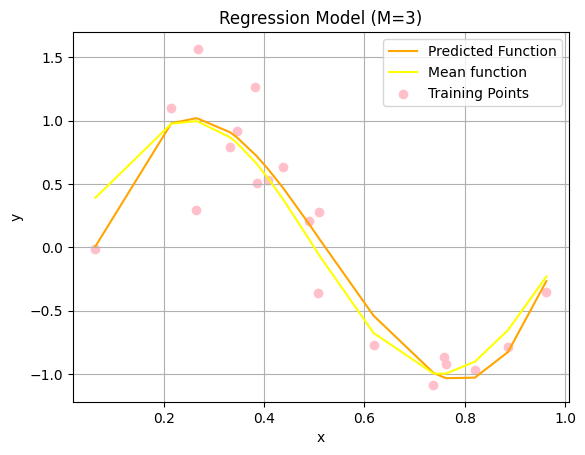

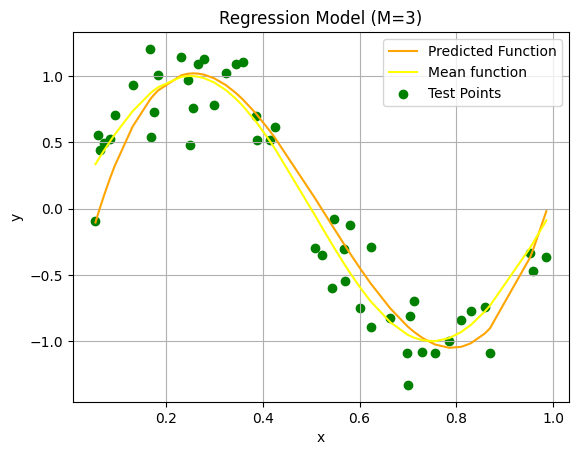

RMSE for the testing dataset (M=3): 0.26174532435962417
beta_3 = 25.3038862886985, beta_2 = -39.828049108719945, beta_1 = 15.310169839692026, beta_0 = -0.7340523732809212


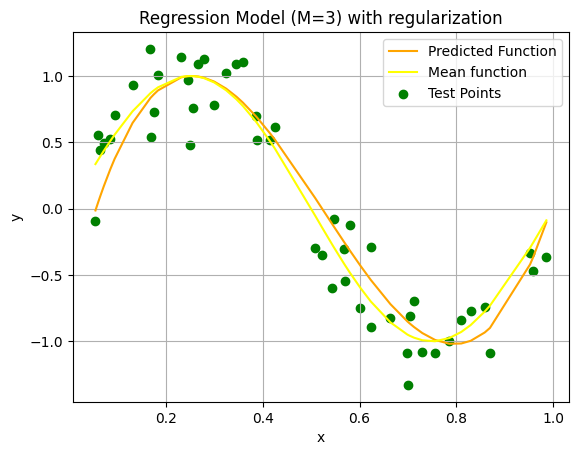

In [194]:
# M = 3

A = []
for i in x1:
    A.append([i**3,i**2,i,1])

# print(np.array(A))

# Regression Calculation
A_t = np.transpose(A)
A_t_A = A_t.dot(A)
A_t_A_inv = np.linalg.inv(A_t_A)
A_t_A_inv_A_t = A_t_A_inv.dot(A_t)
u = A_t_A_inv_A_t.dot(y1)

# Regression Calculation with lambda
lmbda = 0.0001
A_t = np.transpose(A)
A_t_Al = A_t.dot(A) + lmbda*np.eye(4)
A_t_Al_inv = np.linalg.inv(A_t_Al)
A_t_Al_inv_A_t = A_t_Al_inv.dot(A_t)
u2 = A_t_Al_inv_A_t.dot(y1)

print(f"beta_3 = {u[0]}, beta_2 = {u[1]}, beta_1 = {u[2]}, beta_0 = {u[3]}")

x_1 = sorted(x1)
x_1 = np.array(x_1)
x_cpy = sorted(x2)
x_cpy = np.array(x_cpy)

# Plotting the function
plt.plot(x_1,u[0]*x_1**3 + u[1]*x_1**2 + u[2]*x_1 + u[3], label = "Predicted Function", color = 'orange')
plt.plot(x_1,np.sin(2*np.pi*x_1), label = "Mean function", color = 'yellow')
plt.scatter(x1, y1, label = "Training Points", color = 'pink')
plt.title('Regression Model (M=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Plotting the function
plt.plot(x_cpy,u[0]*x_cpy**3 + u[1]*x_cpy**2 + u[2]*x_cpy + u[3], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

print(f"RMSE for the testing dataset (M=3): {calculate_rmse(x2, y2, u)}")

print(f"beta_3 = {u2[0]}, beta_2 = {u2[1]}, beta_1 = {u2[2]}, beta_0 = {u2[3]}")

plt.plot(x_cpy,u2[0]*x_cpy**3 + u2[1]*x_cpy**2 + u2[2]*x_cpy + u2[3], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=3) with regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


beta_9 = -4560.051135370333, beta_8 = 15422.739258073503, beta_7 = -14544.489355940139, beta_6 = -8089.0589832623955, beta_5 = 27003.559616010345, beta_4 = -23075.81667212624, beta_3 = 9828.742244310764, beta_2 = -2223.755249325007, beta_1 = 246.77210144015646, beta_0 = -8.917012723572947


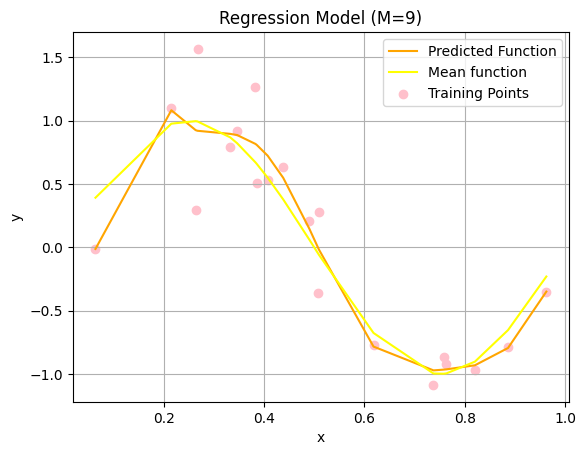

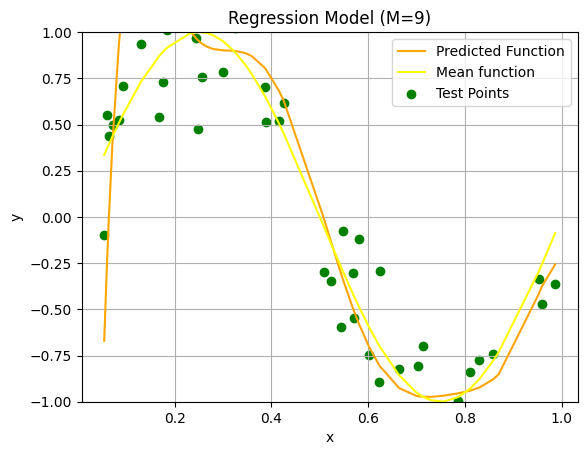

RMSE for the testing dataset (M=9): 0.31426318118376867
beta_9 = -4.374763071830311, beta_8 = -0.7719019848600972, beta_7 = 2.7317479992814575, beta_6 = 5.359692594172542, beta_5 = 5.810690659169262, beta_4 = 2.3572833103426354, beta_3 = -5.821706579566402, beta_2 = -12.838010961235327, beta_1 = 7.718580001382463, beta_0 = -0.15741469102052452


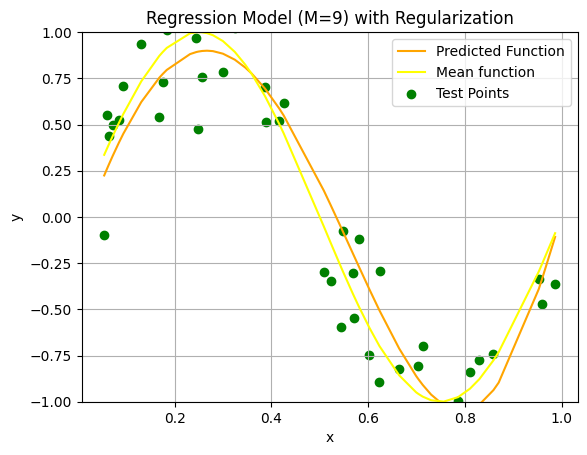

In [195]:
# M = 9

A = []
for i in x1:
    A.append([i**9,i**8,i**7,i**6,i**5,i**4,i**3,i**2,i,1])

# print(np.array(A))

# Regression Calculation
A_t = np.transpose(A)
A_t_A = A_t.dot(A)
A_t_A_inv = np.linalg.inv(A_t_A)
A_t_A_inv_A_t = A_t_A_inv.dot(A_t)
u = A_t_A_inv_A_t.dot(y1)

# Regression Calculation with lambda
lmbda = 0.001
A_t = np.transpose(A)
A_t_Al = A_t.dot(A) + lmbda*np.eye(10)
A_t_Al_inv = np.linalg.inv(A_t_Al)
A_t_Al_inv_A_t = A_t_Al_inv.dot(A_t)
u2 = A_t_Al_inv_A_t.dot(y1)

print(f"beta_9 = {u[0]}, beta_8 = {u[1]}, beta_7 = {u[2]}, beta_6 = {u[3]}, beta_5 = {u[4]}, beta_4 = {u[5]}, beta_3 = {u[6]}, beta_2 = {u[7]}, beta_1 = {u[8]}, beta_0 = {u[9]}")

x_1 = sorted(x1)
x_1 = np.array(x_1)
x_cpy = sorted(x2)
x_cpy = np.array(x_cpy)

# Plotting the function
plt.plot(x_1, u[0]*x_1**9 + u[1]*x_1**8 + u[2]*x_1**7 + u[3]*x_1**6 + u[4]*x_1**5 + u[5]*x_1**4 + u[6]*x_1**3 + u[7]*x_1**2 + u[8]*x_1 + u[9], label = "Predicted Function", color = 'orange')
plt.plot(x_1,np.sin(2*np.pi*x_1), label = "Mean function", color = 'yellow')
plt.scatter(x1, y1, label = "Training Points", color = 'pink')
plt.title('Regression Model (M=9)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Plotting the function
plt.plot(x_cpy, u[0]*x_cpy**9 + u[1]*x_cpy**8 + u[2]*x_cpy**7 + u[3]*x_cpy**6 + u[4]*x_cpy**5 + u[5]*x_cpy**4 + u[6]*x_cpy**3 + u[7]*x_cpy**2 + u[8]*x_cpy + u[9], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=9)')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

print(f"RMSE for the testing dataset (M=9): {calculate_rmse(x2, y2, u)}")

print(f"beta_9 = {u2[0]}, beta_8 = {u2[1]}, beta_7 = {u2[2]}, beta_6 = {u2[3]}, beta_5 = {u2[4]}, beta_4 = {u2[5]}, beta_3 = {u2[6]}, beta_2 = {u2[7]}, beta_1 = {u2[8]}, beta_0 = {u2[9]}")

# Plotting the function
plt.plot(x_cpy, u2[0]*x_cpy**9 + u2[1]*x_cpy**8 + u2[2]*x_cpy**7 + u2[3]*x_cpy**6 + u2[4]*x_cpy**5 + u2[5]*x_cpy**4 + u2[6]*x_cpy**3 + u2[7]*x_cpy**2 + u2[8]*x_cpy + u2[9], label = "Predicted Function", color = 'orange')
plt.plot(x_cpy,np.sin(2*np.pi*x_cpy), label = "Mean function", color = 'yellow')
plt.scatter(x2, y2, label = "Test Points", color = 'green')
plt.title('Regression Model (M=9) with Regularization')
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()